In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics

In [2]:
# Seaborn setup
sns.set(
    style="ticks",
    context="notebook",
    palette="colorblind"
)

# Loading Data

In [3]:
# Loading file
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx")
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
# DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [5]:
# DataFrame statistics
df.describe()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Data treatment

In [6]:
# Replacing negative experience values with the median 
xp_median = df.loc[df["Experience"] > 0, "Experience"].median()  # median of positive values of experience
df["Experience"] = np.where(df["Experience"] < 0, xp_median, df["Experience"])

# Columns to be scaled
cols2scale = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]

# Scaling columns
df[cols2scale] = df[cols2scale].apply(scale)

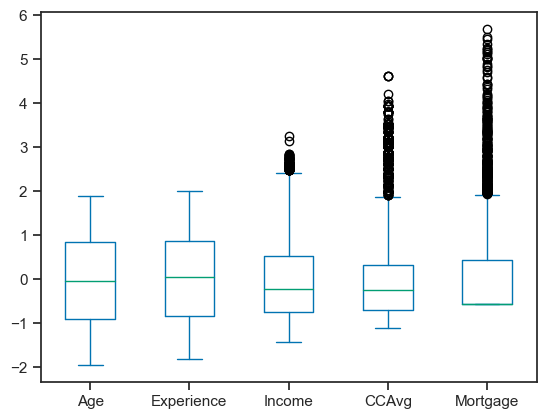

In [7]:
# Plotting boxplot for outlier analysis
df[cols2scale].plot.box();

In [8]:
# Outliers detector
def outlier(array):
    q1, q3 = np.quantile(array, [.25,  .75])
    iqr = q3 - q1
    ul = q3 + 1.5*iqr  # upper limit
    ll = q3 - 1.5*iqr  # lower limit
    return (array > ul) | (array < ll)

In [9]:
# Outliers replacement
for col in cols2scale:
    df.loc[outlier(df[col]), col] = df.loc[~outlier(df[col]), col].median()

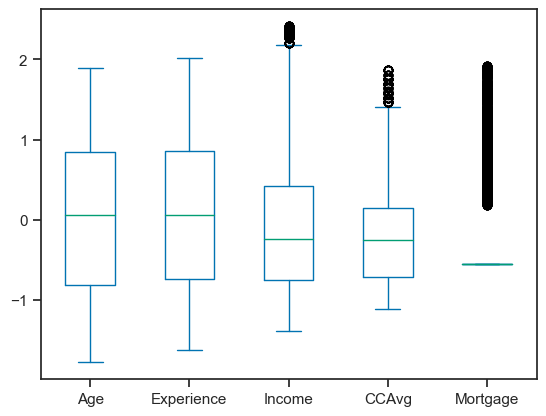

In [10]:
# Plotting boxplot for outlier analysis
df[cols2scale].plot.box();

# Training Model

In [11]:
# Separating dataset in X and y
X = df[df.columns.drop(["ID", "Personal_Loan"])]
y = df["Personal_Loan"]

# Separating X and y in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [12]:
# Declaring model
lr = LogisticRegression()

# Fitting model
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Model Evaluation

In [13]:
# Metrics for model evaluation
print(f"Accuracy: {metrics.accuracy_score(y_pred, y_test)}")
print(f"Balanced Accuracy: {metrics.balanced_accuracy_score(y_pred, y_test)}")
print(f"Recall: {metrics.recall_score(y_pred, y_test)}")
print(f"Precision: {metrics.precision_score(y_pred, y_test)}")
print(f"F1-score: {metrics.f1_score(y_pred, y_test)}")
print(f"ROCAUC: {metrics.roc_auc_score(y_pred, y_test)}")

Accuracy: 0.949
Balanced Accuracy: 0.9131336405529954
Recall: 0.8714285714285714
Precision: 0.5922330097087378
F1-score: 0.7052023121387283
ROCAUC: 0.9131336405529954


In [14]:
X_test.assign(churn=y_test).assign(label=lr.predict(X_test))

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,churn,label
1421,-0.291258,-0.296657,-0.429602,4,-0.021696,3,1.057005,0,0,0,0,0,0
3417,-0.552992,-0.741020,-1.103089,3,-0.536720,2,-0.555524,0,0,1,1,0,0
3338,-0.901970,-1.007637,-0.668581,4,-0.422270,2,-0.555524,1,0,1,0,0,0
2498,-0.640236,-0.563274,0.808744,2,-0.250595,1,-0.555524,0,0,0,0,0,0
3758,0.144966,0.236579,-0.234074,2,-0.250595,1,-0.555524,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4610,-0.727481,-0.652147,0.113532,1,0.951127,2,0.467055,0,0,1,0,0,0
2718,1.191902,1.125305,-0.125447,2,0.207204,3,-0.555524,1,0,0,0,0,0
4436,1.279146,1.303050,-0.885835,2,-0.822844,2,-0.555524,0,0,1,0,0,0
311,0.581189,0.503197,1.025998,1,-0.250595,1,1.086502,0,0,1,0,0,0


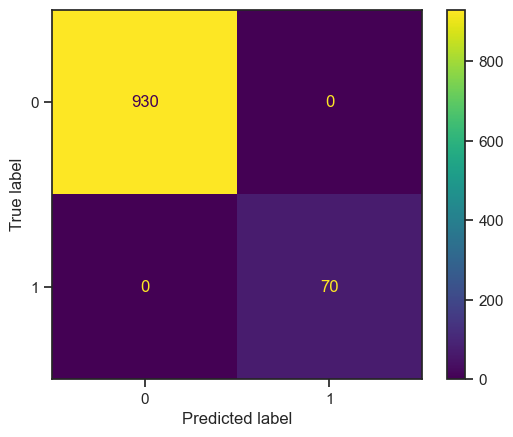

In [15]:
# Confusion matrix
metrics.ConfusionMatrixDisplay.from_estimator(lr, X_test, y_pred, labels=lr.classes_);

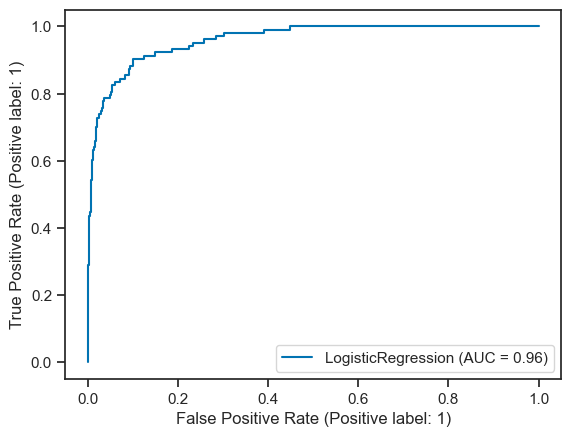

In [16]:
# ROC Curve
metrics.RocCurveDisplay.from_estimator(lr, X_test, y_test);